# A Transfer Learning and Optimized CNN Based Intrusion Detection System for Drone


**Notebook 2: CNN Model Development**  
Aims:  
&nbsp; 1): Generate training and test images  
&nbsp; 2): Construct CNN models (a CNN model by own, Xception, VGG16, VGG19, Resnet, Inception, InceptionResnet)  
&nbsp; 3): Tune the hyperparameters of CNN models (hyperparameter optimization)  

## Import libraries

In [ ]:
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.applications.xception import  Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers.legacy import Adam #hadas
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.mobilenet import MobileNet
import tensorflow.keras.callbacks as kcallbacks
import tensorflow.keras
# hadas
from tensorflow.keras.utils import load_img,img_to_array

import math
import random
# hadas
# from keras.utils import plot_model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from google.colab import drive
import pandas as pd
import json

#define the objective function to be optimized
import time
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials
import matplotlib.pyplot as plt
import statistics

##google drive

In [ ]:
PROJECT_PATH= '/content/drive/MyDrive/project/'

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


##Unzip data

In [ ]:
DATA1='NSL-KDD'
DATA2='CICIDS2017'

In [ ]:
# def change_name_folder(name_data,name_folder,train_flag):
#   if train_flag:
#      os.rename(name_folder, 'train_224_'+name_data)
#   else:
#     os.rename(name_folder, 'test_224_'+name_data)


def unzip_folder(name_data,name_folder,train_flag=True):
  if train_flag:
    data_zip_path=os.path.join(PROJECT_PATH,'data',name_data,'train_224_'+name_data )
    print(data_zip_path)
  else:
    data_zip_path=os.path.join(PROJECT_PATH,'data',name_data,'test_224_'+name_data )
  print(data_zip_path)
  !unzip -n {data_zip_path}
  # change_name_folder(name_data,name_folder,train_flag)


###Unzip train NSL-KDD

In [ ]:
unzip_folder(DATA1,'train_224')
# os.rename('train_224', 'train_224_'+DATA1)

Streaming output truncated to the last 5000 lines.
  inflating: train_224_NSL-KDD/4/49357.png  
  inflating: train_224_NSL-KDD/4/49359.png  
  inflating: train_224_NSL-KDD/4/4936.png  
  inflating: train_224_NSL-KDD/4/49361.png  
  inflating: train_224_NSL-KDD/4/49362.png  
  inflating: train_224_NSL-KDD/4/49363.png  
  inflating: train_224_NSL-KDD/4/49364.png  
  inflating: train_224_NSL-KDD/4/49365.png  
  inflating: train_224_NSL-KDD/4/49367.png  
  inflating: train_224_NSL-KDD/4/49368.png  
  inflating: train_224_NSL-KDD/4/49369.png  
  inflating: train_224_NSL-KDD/4/4937.png  
  inflating: train_224_NSL-KDD/4/49370.png  
  inflating: train_224_NSL-KDD/4/49372.png  
  inflating: train_224_NSL-KDD/4/49373.png  
  inflating: train_224_NSL-KDD/4/49374.png  
  inflating: train_224_NSL-KDD/4/49375.png  
  inflating: train_224_NSL-KDD/4/49376.png  
  inflating: train_224_NSL-KDD/4/49377.png  
  inflating: train_224_NSL-KDD/4/49378.png  
  inflating: train_224_NSL-KDD/4/49379.png  
  infl

###Unzip test NSL-KDD

In [ ]:
unzip_folder(DATA1,'test_224',train_flag=False)
# os.rename('test_224', 'test_224_'+DATA1)

Streaming output truncated to the last 5000 lines.
  inflating: test_224_NSL-KDD/4/33168.png  
  inflating: test_224_NSL-KDD/4/33182.png  
  inflating: test_224_NSL-KDD/4/33183.png  
  inflating: test_224_NSL-KDD/4/33184.png  
  inflating: test_224_NSL-KDD/4/33185.png  
  inflating: test_224_NSL-KDD/4/33187.png  
  inflating: test_224_NSL-KDD/4/33190.png  
  inflating: test_224_NSL-KDD/4/33194.png  
  inflating: test_224_NSL-KDD/4/33196.png  
  inflating: test_224_NSL-KDD/4/3320.png  
  inflating: test_224_NSL-KDD/4/33200.png  
  inflating: test_224_NSL-KDD/4/33202.png  
  inflating: test_224_NSL-KDD/4/33204.png  
  inflating: test_224_NSL-KDD/4/33207.png  
  inflating: test_224_NSL-KDD/4/33209.png  
  inflating: test_224_NSL-KDD/4/33217.png  
  inflating: test_224_NSL-KDD/4/33220.png  
  inflating: test_224_NSL-KDD/4/33222.png  
  inflating: test_224_NSL-KDD/4/33225.png  
  inflating: test_224_NSL-KDD/4/33240.png  
  inflating: test_224_NSL-KDD/4/33243.png  
  inflating: test_224_NSL-

###Unzip train CICIDS2017

In [ ]:
t1=time.time()
unzip_folder(DATA2,'train_224_CIC')

Streaming output truncated to the last 5000 lines.
  inflating: train_224_CIC/6/4362.png  
  inflating: train_224_CIC/6/4363.png  
  inflating: train_224_CIC/6/4364.png  
  inflating: train_224_CIC/6/4365.png  
  inflating: train_224_CIC/6/4366.png  
  inflating: train_224_CIC/6/4368.png  
  inflating: train_224_CIC/6/4369.png  
  inflating: train_224_CIC/6/437.png  
  inflating: train_224_CIC/6/4370.png  
  inflating: train_224_CIC/6/4371.png  
  inflating: train_224_CIC/6/4372.png  
  inflating: train_224_CIC/6/4373.png  
  inflating: train_224_CIC/6/4375.png  
  inflating: train_224_CIC/6/4376.png  
  inflating: train_224_CIC/6/4377.png  
  inflating: train_224_CIC/6/4378.png  
  inflating: train_224_CIC/6/438.png  
  inflating: train_224_CIC/6/4380.png  
  inflating: train_224_CIC/6/4381.png  
  inflating: train_224_CIC/6/4383.png  
  inflating: train_224_CIC/6/4385.png  
  inflating: train_224_CIC/6/4387.png  
  inflating: train_224_CIC/6/4388.png  
  inflating: train_224_CIC/6/43

###Unzip test CICIDS2017

In [ ]:
unzip_folder(DATA2,'test_224_CIC',train_flag=False)


Streaming output truncated to the last 5000 lines.
  inflating: test_224_CIC/2/93424.png  
  inflating: test_224_CIC/2/9343.png  
  inflating: test_224_CIC/2/93433.png  
  inflating: test_224_CIC/2/93438.png  
  inflating: test_224_CIC/2/93439.png  
  inflating: test_224_CIC/2/93448.png  
  inflating: test_224_CIC/2/93463.png  
  inflating: test_224_CIC/2/93464.png  
  inflating: test_224_CIC/2/93465.png  
  inflating: test_224_CIC/2/93466.png  
  inflating: test_224_CIC/2/93468.png  
  inflating: test_224_CIC/2/9347.png  
  inflating: test_224_CIC/2/93470.png  
  inflating: test_224_CIC/2/93476.png  
  inflating: test_224_CIC/2/93477.png  
  inflating: test_224_CIC/2/93478.png  
  inflating: test_224_CIC/2/93488.png  
  inflating: test_224_CIC/2/93491.png  
  inflating: test_224_CIC/2/93497.png  
  inflating: test_224_CIC/2/9350.png  
  inflating: test_224_CIC/2/93506.png  
  inflating: test_224_CIC/2/9351.png  
  inflating: test_224_CIC/2/93510.png  
  inflating: test_224_CIC/2/93511

In [ ]:

t2=time.time()
print("Time: "+str(t2-t1))

Time: 797.8149235248566


##CUDA

In [ ]:
gpus=tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
if len(gpus):
  print(gpus)

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


##Constants

In [ ]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32
# COLOR_MODE='grayscale'

## Generate Training and Test Images

###Generate Functions

In [ ]:
def make_name_folder(data):
  train_folder='./train_224_'+data+'/'
  test_folder='./test_224_'+data+'/'
  return train_folder,test_folder

def image_generator(data):
  train_folder,test_folder =make_name_folder(data)
  #Normalization
  train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
  test_datagen = ImageDataGenerator(rescale=1./255)
  train_generator = train_datagen.flow_from_directory(
        train_folder,
        target_size=TARGET_SIZE,
        # color_mode=COLOR_MODE,
        batch_size=BATCHSIZE,
        class_mode='categorical',
        subset='training')
  validation_generator = train_datagen.flow_from_directory(
        train_folder,
        target_size=TARGET_SIZE,
        # color_mode=COLOR_MODE,
        batch_size=BATCHSIZE,
        class_mode='categorical',
        subset='validation')
  test_generator = test_datagen.flow_from_directory(
        test_folder,
        target_size=TARGET_SIZE,
        # color_mode=COLOR_MODE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
  return train_generator,validation_generator,test_generator

###Genrate NSL-KDD

In [ ]:
train_generator_NSL_KDD,validation_generator_NSL_KDD,test_generator_NSL_KDD=image_generator(DATA1)

Found 179484 images belonging to 5 classes.
Found 44868 images belonging to 5 classes.
Found 56087 images belonging to 5 classes.


(128, 224, 224, 3)


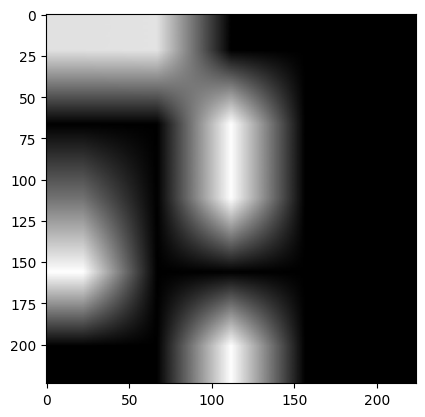

(128, 224, 224, 3)


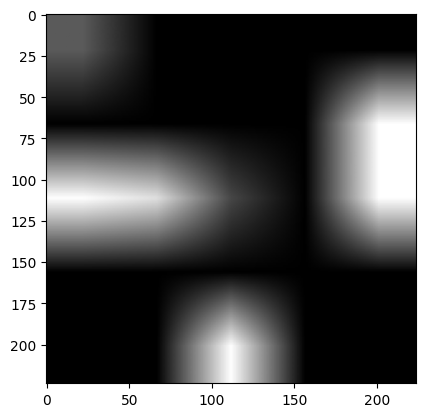

(128, 224, 224, 3)


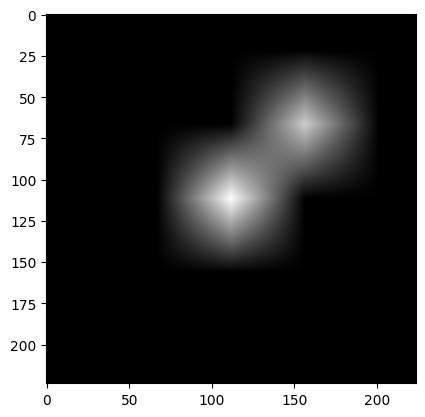

(128, 224, 224, 3)


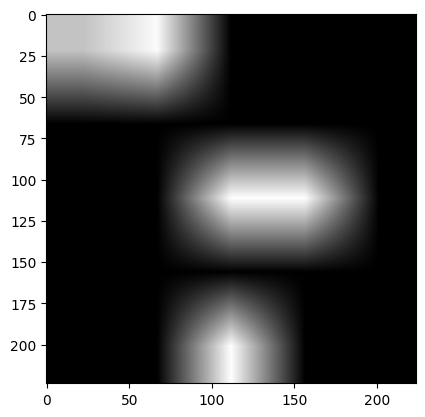

(128, 224, 224, 3)


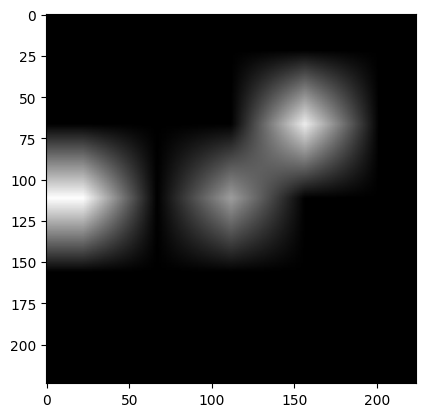

In [ ]:
for _ in range(5):
    img, label = train_generator_NSL_KDD.next()
    # print(f'label{label.shape}')
    # print(label)
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

###Genrate CICIDS2017

In [ ]:
train_generator_CICIDS2017,validation_generator_CICIDS2017,test_generator_CICIDS2017=image_generator(DATA2)

Found 1472530 images belonging to 7 classes.
Found 368130 images belonging to 7 classes.
Found 460165 images belonging to 7 classes.


(128, 224, 224, 3)


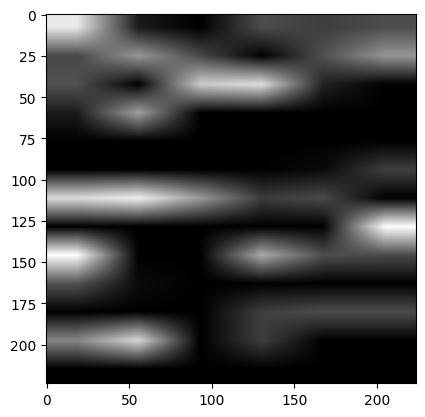

(128, 224, 224, 3)


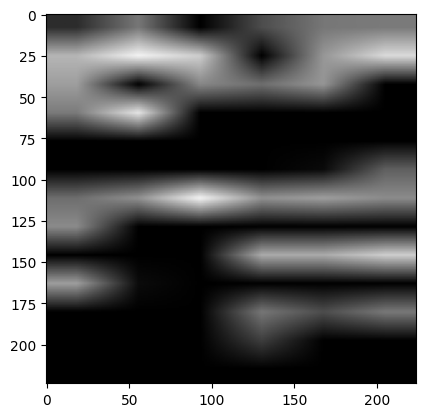

(128, 224, 224, 3)


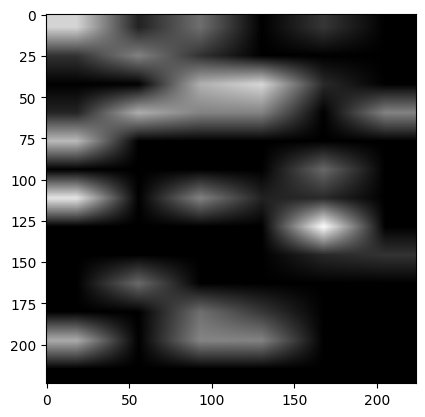

(128, 224, 224, 3)


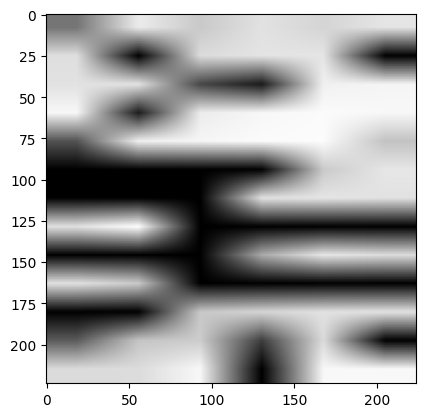

(128, 224, 224, 3)


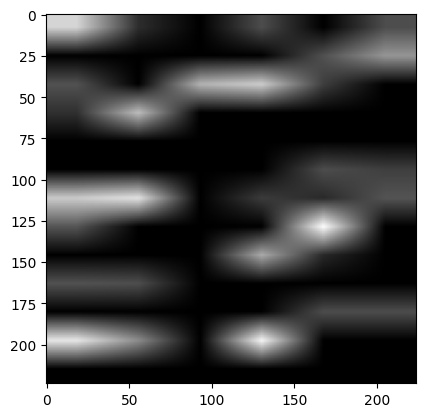

In [ ]:
for _ in range(5):
    img, label = train_generator_CICIDS2017.next()
    # print(f'label{label.shape}')
    # print(label)
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

### Define the image plotting functions

In [ ]:
#plot the figures
class LossHistory(tensorflow.keras.callbacks.Callback):# hadas
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [ ]:
history_this= LossHistory()

#Utils

In [ ]:
def make_path_model(data,savepath):
  return os.path.join(PROJECT_PATH,'training',data,'models',savepath)

def save_json(dictionary, path):
  with open(path+'.json', "w") as outfile:
      json.dump(dictionary, outfile)

def save_history(history,model_name,data):
  path=make_path_model(data,f'history-{model_name}')
  save_json(history.history, path)
  return history.history

def save_model(model, model_name,data):
    save_path =make_path_model(data,f'{model_name}.h5')
    model.save_weights(save_path)

def prediction(perd_model,data,validation_generator,test_generator):
  # test_images,test_labels=test_generator(data)
  results = perd_model.evaluate(test_generator, batch_size=BATCHSIZE,verbose = 0)
  return results

# Construct CNN models

### Model 1: a CNN model by own (baseline)

In [ ]:
# def cnn_by_own(input_shape,num_class,epochs,data,savepath='./model_own.h5'):
#     # path=make_path_moodel(data,savepath)
#     model = Sequential()
#     model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
#     model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
#     model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
#     model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
#     model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
#     model.add(GlobalAveragePooling2D())
#     model.add(Dense(256,activation='relu'))
#     model.add(Dropout(rate=0.5))
#     model.add(Dense(num_class,activation='softmax'))
#     model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#     # model.summary()
#     #train model
#     earlyStopping=kcallbacks.EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='auto')
#     saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
#     # hadas
#     # hist=model.fit_generator(
#     hist=model.fit(
#         train_generator,
#         steps_per_epoch=len(train_generator),
#         epochs=epochs,
#         validation_data=validation_generator,
#         validation_steps=len(validation_generator),
#         callbacks=[earlyStopping,saveBestModel,history_this],
#     )

In [ ]:
# cnn_by_own(input_shape=INPUT_SIZE,num_class=5,epochs=1,data=DATA1)
# history_this.loss_plot('epoch')
# history_this.loss_plot('batch')
# plt.show()

Validation accuracy of a CNN by own: 99.884%

### Model 2: Xception

In [ ]:
def xception( num_class,train_generator,validation_generator,data,epochs=20,frozen=131,lr=0.001,patience=2,
             dropout_rate=0.5,verbose=0, name='xception',history=history_this,input_shape=INPUT_SIZE):
    name_file=f'{name}_frozen:{frozen}_epochs={epochs}_patience={patience}_lr={lr}_dropout={dropout_rate}.h5'
    path=make_path_model(data,name_file)
    model_fine_tune = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:frozen]:		#could be tuned to be 50, 100, or 131
        layer.trainable = False
    for layer in model_fine_tune.layers[frozen:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='xception')
    opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=patience, verbose=verbose, mode='auto')	#patience could be tuned by 2 and 3
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=path,
        monitor='val_accuracy',
        verbose=verbose,
        save_best_only=True,
        mode='auto')
    hist = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
        verbose = verbose
    )
    # save_model(model, 'xception',data)
    # save_history(hist,'xception',data)
    return hist,path

83683744/83683744 [==============================] - 4s 0us/step
Epoch 1/20
1403/1403 [==============================] - ETA: 0s - loss: 0.2476 - accuracy: 0.9043
Epoch 1: val_accuracy improved from -inf to 0.93220, saving model to /content/drive/MyDrive/project/training/NSL-KDD/models/xception_frozen:131_epochs=20_patience=2_lr=0.001_dropout=0.5.h5
1403/1403 [==============================] - 437s 303ms/step - loss: 0.2476 - accuracy: 0.9043 - val_loss: 0.1646 - val_accuracy: 0.9322
Epoch 2/20
1403/1403 [==============================] - ETA: 0s - loss: 0.1767 - accuracy: 0.9289
Epoch 2: val_accuracy improved from 0.93220 to 0.94399, saving model to /content/drive/MyDrive/project/training/NSL-KDD/models/xception_frozen:131_epochs=20_patience=2_lr=0.001_dropout=0.5.h5
1403/1403 [==============================] - 422s 301ms/step - loss: 0.1767 - accuracy: 0.9289 - val_loss: 0.1422 - val_accuracy: 0.9440
Epoch 3/20
1403/1403 [==============================] - ETA: 0s - loss: 0.1640 - acc

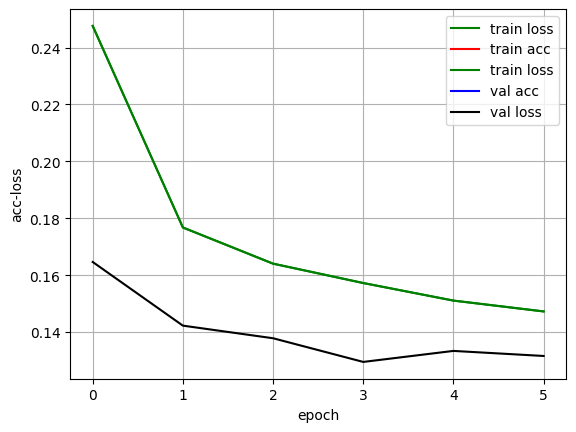

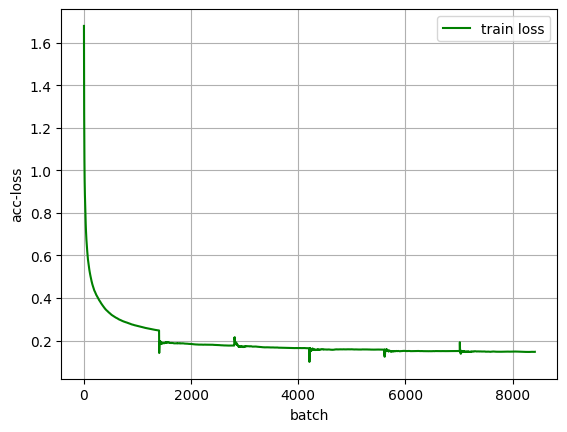

In [ ]:
#default only 50, tf36cnn 99
xception(5,train_generator_NSL_KDD,validation_generator_NSL_KDD,DATA1,verbose=1)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

In [ ]:
path='/content/drive/MyDrive/project/training/NSL-KDD/models/xception_frozen:131_epochs=20_patience=2_lr=0.001_dropout=0.5.h5'
results=prediction(perd_model=load_model(path),data=DATA1,validation_generator=validation_generator_NSL_KDD,
                   test_generator=test_generator_NSL_KDD)


In [ ]:
print(f'accuracy:{results[1]}, loss: {results[0]}')

accuracy:0.9410558342933655, loss: 0.13534756004810333


In [ ]:
hist,path=xception(7,train_generator_CICIDS2017,validation_generator_CICIDS2017,DATA2,verbose=1)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

Epoch 1/20
11505/11505 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9871
Epoch 1: val_accuracy improved from -inf to 0.96216, saving model to /content/drive/MyDrive/project/training/CICIDS2017/models/xception_frozen:131_epochs=20_patience=2_lr=0.001_dropout=0.5.h5
11505/11505 [==============================] - 4749s 412ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.3555 - val_accuracy: 0.9622
Epoch 2/20
11505/11505 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9919
Epoch 2: val_accuracy improved from 0.96216 to 0.96992, saving model to /content/drive/MyDrive/project/training/CICIDS2017/models/xception_frozen:131_epochs=20_patience=2_lr=0.001_dropout=0.5.h5
11505/11505 [==============================] - 4525s 393ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.6301 - val_accuracy: 0.9699
Epoch 3/20
11505/11505 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9926
Epoch 3: val_accuracy did not imp

In [ ]:
path='/content/drive/MyDrive/project/training/CICIDS2017/models/xception_frozen:131_epochs=20_patience=2_lr=0.001_dropout=0.5.h5'
results=prediction(perd_model=load_model(path),data=DATA1,validation_generator=validation_generator_NSL_KDD,
                   test_generator=test_generator_NSL_KDD)

print(f'accuracy:{results[1]}, loss: {results[0]}')

InvalidArgumentError: ignored

Validation accuracy of Xception: 100.0%

### Model 3: VGG16

In [ ]:
def vgg16( num_class,train_generator,validation_generator,data,epochs=20,frozen=15,lr=0.001,patience=2, dropout_rate=0.5,
          verbose=0, name='VGG16',history=history_this,input_shape=INPUT_SIZE):
    name_file=f'{name}_frozen:{frozen}_epochs={epochs}_patience={patience}_lr={lr}_dropout={dropout_rate}.h5'
    path=make_path_model(data,name_file)
    model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:frozen]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[frozen:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	#set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=patience, verbose=verbose, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=path,
        monitor='val_accuracy',
        verbose=verbose,
        save_best_only=True,
        mode='auto')
    hist = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        #workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
        verbose = verbose
    )
    # save_model(model, 'VGG16',data)
    # save_history(hist,'VGG16',data)
    return hist,path

788/788 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9652
Epoch 1: val_accuracy improved from -inf to 0.99496, saving model to /content/drive/MyDrive/project/training/NSL-KDD/models/VGG16_frozen:15_epochs=1_patience=2_lr=0.001_dropout=0.5.h5
788/788 [==============================] - 239s 301ms/step - loss: 0.0989 - accuracy: 0.9652 - val_loss: 0.0176 - val_accuracy: 0.9950


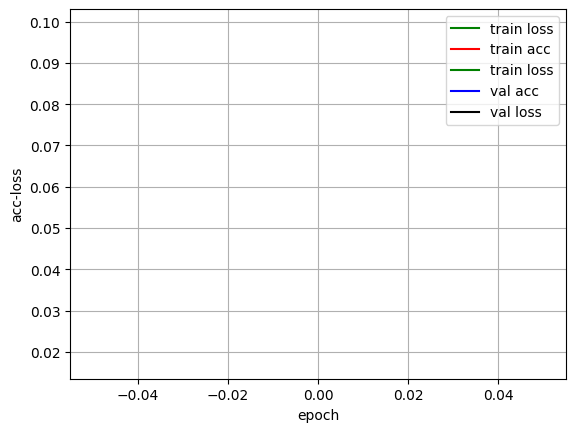

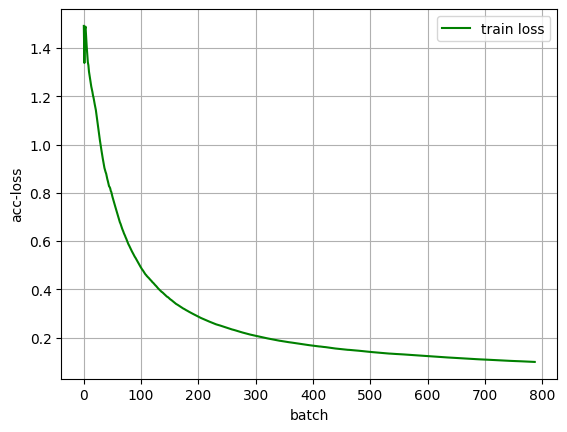

In [ ]:
vgg16(5,train_generator_NSL_KDD,validation_generator_NSL_KDD,DATA1,epochs=1,verbose=1)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

Validation accuracy of VGG16: 100.0%

### Model 4: VGG19

In [ ]:
def vgg19( num_class,train_generator,validation_generator,data,epochs=20,frozen=19,lr=0.001,patience=2,
          dropout_rate=0.5,verbose=0, name='VGG19',history=history_this,input_shape=INPUT_SIZE):
    name_file=f'{name}_frozen:{frozen}_epochs={epochs}_patience={patience}_lr={lr}_dropout={dropout_rate}.h5'
    path=make_path_model(data,name_file)
    model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:frozen]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[frozen:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	#set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=patience, verbose=verbose, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=path,
        monitor='val_accuracy',
        verbose=verbose,
        save_best_only=True,
        mode='auto')
    hist = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        #workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
        verbose = verbose
    )
    # save_model(model, 'VGG19',data)
    # save_history(hist,'VGG19',data)
    return hist,path


788/788 [==============================] - 234s 295ms/step - loss: 0.0826 - accuracy: 0.9720 - val_loss: 0.0222 - val_accuracy: 0.9940


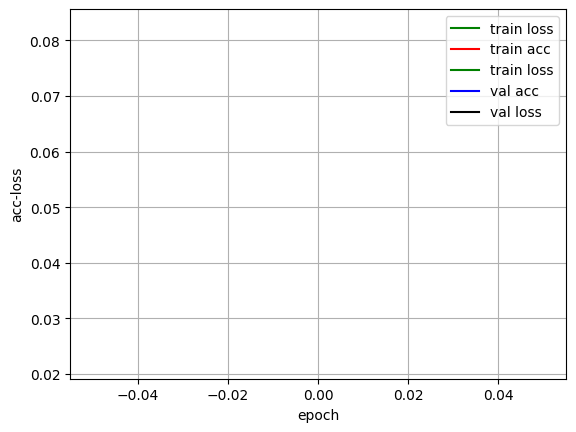

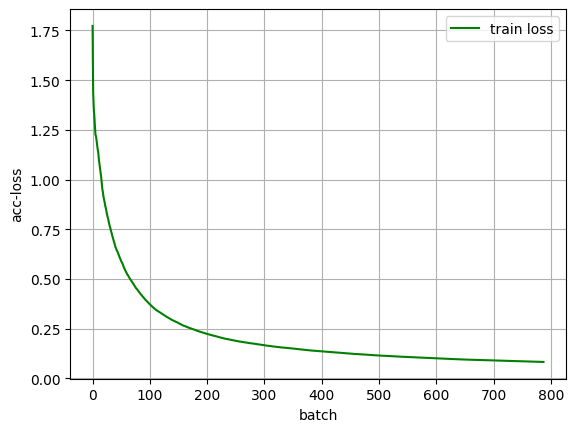

In [ ]:
vgg19(5,train_generator_NSL_KDD,validation_generator_NSL_KDD,DATA1,epochs=1)	#binary classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

Validation accuracy of VGG19: 100.0%

### Model 5: ResNet

In [ ]:
def resnet( num_class,train_generator,validation_generator,data,epochs=20,frozen=120,lr=0.001,patience=2,
           dropout_rate=0.5,verbose=0, name='resnet',history=history_this,input_shape=INPUT_SIZE):
    name_file=f'{name}_frozen:{frozen}_epochs={epochs}_patience={patience}_lr={lr}_dropout={dropout_rate}.h5'
    path=make_path_model(data,name_file)
    model_fine_tune = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:frozen]:	#the number of frozen layers for transfer learning, have tuned from 50-150
        layer.trainable = False
    for layer in model_fine_tune.layers[frozen:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=patience, verbose=verbose, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=path,
        monitor='val_accuracy',
        verbose=verbose,
        save_best_only=True,
        mode='auto')
    hist = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
        verbose=verbose
    )
    # save_model(model, 'ResNet',data)
    # save_history(hist,'ResNet',data)
    return hist,path

94765736/94765736 [==============================] - 0s 0us/step


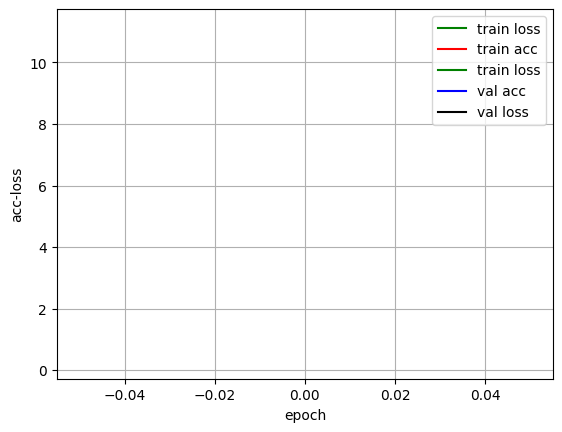

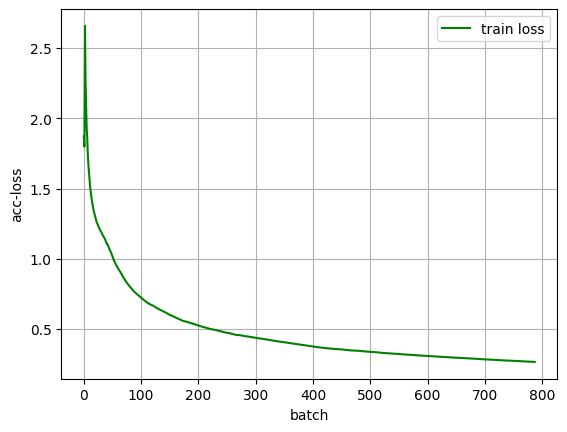

In [ ]:
resnet(5,train_generator_NSL_KDD,validation_generator_NSL_KDD,DATA1,epochs=1)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

Validation accuracy of Resnet: 98.652%

### Model 6: Inception

In [ ]:
def inception( num_class,train_generator,validation_generator,data,epochs=20,frozen=35,lr=0.001,patience=2, dropout_rate=0.5,
              verbose=0, name='inception.',history=history_this,input_shape=INPUT_SIZE):
    name_file=f'{name}_frozen:{frozen}_epochs={epochs}_patience={patience}_lr={lr}_dropout={dropout_rate}.h5'
    path=make_path_model(data,name_file)
    model_fine_tune = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:frozen]:	#the number of frozen layers for transfer learning, have tuned from 50-150
        layer.trainable = False
    for layer in model_fine_tune.layers[frozen:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=patience, verbose=verbose, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=path,
        monitor='val_accuracy',
        verbose=verbose,
        save_best_only=True,
        mode='auto')
    hist = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
        verbose=verbose
    )
    # save_model(model, 'inception',data)
    # save_history(hist,'inception',data)
    return hist,path

In [ ]:
def prediction(perd_model,data,validation_generator,test_generator):
  # test_images,test_labels=test_generator(data)
  results = perd_model.evaluate(test_generator, batch_size=BATCHSIZE,verbose = 0)
  return results

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/20
788/788 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9878
Epoch 1: val_accuracy improved from -inf to 0.99067, saving model to /content/drive/MyDrive/project/training/NSL-KDD/models/inception._frozen:35_epochs=20_patience=2_lr=0.001_dropout=0.5.h5
788/788 [==============================] - 273s 302ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0345 - val_accuracy: 0.9907
Epoch 2/20
788/788 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9955
Epoch 2: val_accuracy improved from 0.99067 to 0.99587, saving model to /content/drive/MyDrive/project/training/NSL-KDD/models/inception._frozen:35_epochs=20_patience=2_lr=0.001_dropout=0.5.h5
788/788 [==============================] - 234s 297ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0151 - val_accuracy: 0.9959
Epoch 3/20
788/788 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0

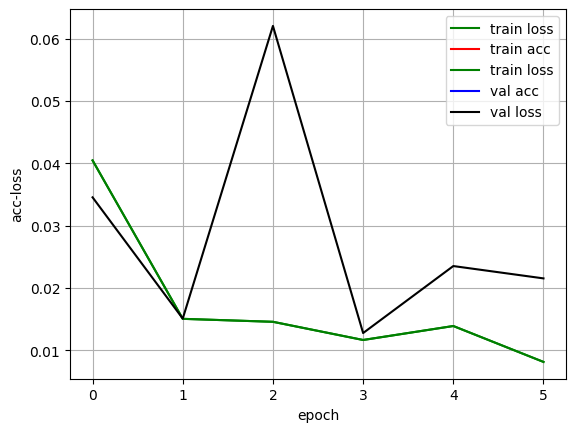

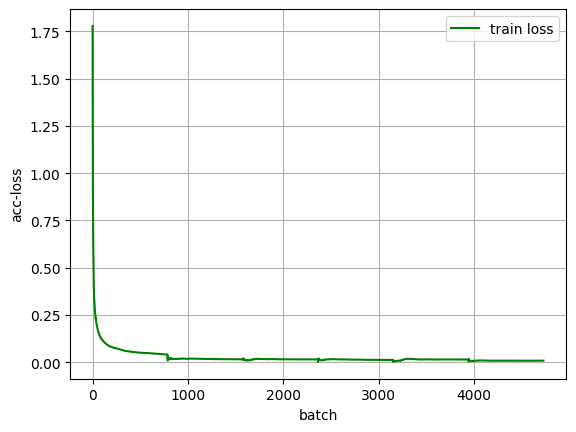

In [ ]:
hist,path=inception(5,train_generator_NSL_KDD,validation_generator_NSL_KDD,DATA1,verbose=1)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

In [ ]:
results=prediction(perd_model=load_model(path),data=DATA1,validation_generator=validation_generator_NSL_KDD,
                   test_generator=test_generator_NSL_KDD)

print(f'accuracy:{results[1]}, loss: {results[0]}')

accuracy:0.7550567984580994, loss: 2.3367886543273926


In [ ]:
hist,path=inception(5,train_generator_CICIDS2017,validation_generator_CICIDS2017,DATA2,verbose=1)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
results=prediction(perd_model=load_model(path),data=DATA2,validation_generator=validation_generator_CICIDS2017,
                   test_generator=test_generator_CICIDS2017)

print(f'accuracy:{results[1]}, loss: {results[0]}')

Validation accuracy of Inception: 100.0%

### Model 7: InceptionResnet

In [ ]:
def inceptionresnet( num_class,train_generator,validation_generator,data,epochs=20,frozen=500,lr=0.001,patience=2,
                    dropout_rate=0.5,verbose=0, name='inceptionresnet',history=history_this,input_shape=INPUT_SIZE):
    name_file=f'{name}_frozen:{frozen}_epochs={epochs}_patience={patience}_lr={lr}_dropout={dropout_rate}.h5'
    path=make_path_model(data,name_file)
    model_fine_tune = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:frozen]:	#the number of frozen layers for transfer learning, have tuned from 400-550
        layer.trainable = False
    for layer in model_fine_tune.layers[frozen:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=patience, verbose=verbose, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=path,
        monitor='val_accuracy',
        verbose=verbose,
        save_best_only=True,
        mode='auto')
    hist = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
        verbose=verbose
    )
    # save_model(model, 'inceptionresnet',data)
    # save_history(hist,'inceptionresnet',data)
    return hist,path

219055592/219055592 [==============================] - 1s 0us/step


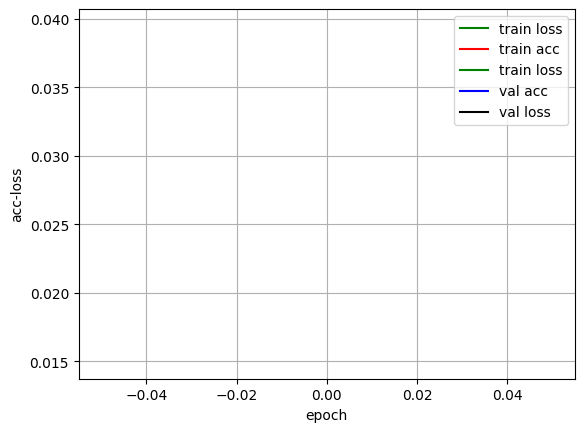

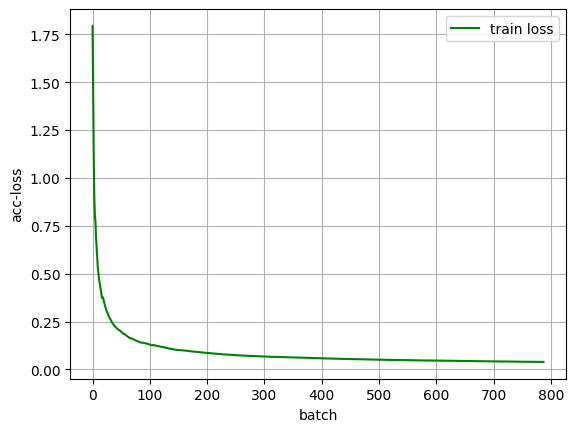

In [ ]:
inceptionresnet(5,train_generator_NSL_KDD,validation_generator_NSL_KDD,DATA1,epochs=1)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

Validation accuracy of InceptionResnet: 99.993%

# Hyperparameter Optimization
Use VGG16 as an example.  

Tuned hyperparameters of CNN:
1. The number of frozen layers
2. The number of epochs
3. Early stop patience
4. Learning rate
5. Dropout rate

Hyperparameter optimization methods:
1. Random search
2. Bayesian optimization - Tree Parzen Estimator(BO-TPE)

##Functions

###Import

In [ ]:
#define the objective function to be optimized
import time
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials
import matplotlib.pyplot as plt
import statistics

###prediction()

In [ ]:
def prediction(perd_model,data,test_generator):
  # test_images,test_labels=test_generator(data)
  results = perd_model.evaluate(test_generator, batch_size=BATCHSIZE,verbose = 0)
  return results

### objective()

In [ ]:
def objective(model,name_model,train_generator,validation_generator,test_generator,data,params):
  params = {
        'frozen': int(params['frozen']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
  frozen=params['frozen']
  epochs=params['epochs']
  patience=params['patience']
  lr=params['lr']
  dropout_rate=params['dropout_rate']

  # model(num_class=5, frozen=frozen,epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)
  print(f'start training:frozen={frozen}, epochs={epochs}, patience={patience}, lr={lr}, dropout={dropout_rate}')
  hist,path=model( num_class=5,train_generator=train_generator,validation_generator=validation_generator,data=data,
        epochs=epochs,frozen=frozen,lr=lr,patience=patience,dropout_rate=dropout_rate)
  print(f'finish {model}')
  # path=make_path_model(data,name_model)
  print(f'path- {path}')
  results=prediction(perd_model=load_model(path),data=data,test_generator=test_generator)

  print(f'accuracy:{results[1]}, loss: {results[0]}')
  return {'loss': -results[1], 'status': STATUS_OK }

## Training and finding optimal Hyperparameter:NSL-KDD

###Bayesian optimization - Tree Parzen Estimator

#### Model 2: Xception

In [ ]:
space = {
    'frozen': hp.quniform('frozen', 125, 135, 1),
    'epochs': hp.quniform('epochs', 5, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=lambda d: objective(model=xception,name_model='xception.h5',
                                   train_generator=train_generator_NSL_KDD,
                                   validation_generator=validation_generator_NSL_KDD,
                                   test_generator=test_generator_NSL_KDD,data=DATA1,
                                   params=d),
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

start training:frozen=133, epochs=10, patience=4, lr=0.006, dropout=0.30000000000000004
finish <function xception at 0x7f958af56e50>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/xception_frozen:133_epochs=10_patience=4_lr=0.006_dropout=0.30000000000000004.h5
accuracy:0.9462442398071289, loss: 0.13134534657001495
start training:frozen=129, epochs=15, patience=4, lr=0.002, dropout=0.5
finish <function xception at 0x7f958af56e50>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/xception_frozen:129_epochs=15_patience=4_lr=0.002_dropout=0.5.h5
accuracy:0.9627721309661865, loss: 0.08526688814163208
start training:frozen=134, epochs=5, patience=2, lr=0.003, dropout=0.6000000000000001
finish <function xception at 0x7f958af56e50>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/xception_frozen:134_epochs=5_patience=2_lr=0.003_dropout=0.6000000000000001.h5
accuracy:0.9395938515663147, loss: 0.14531908929347992
start training:frozen=129, epochs=10, patience

#### Model 3: VGG16

In [ ]:
space = {
    'frozen': hp.quniform('frozen', 14, 18, 1),
    'epochs': hp.quniform('epochs', 5, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=lambda d: objective(model=vgg16,name_model='VGG16.h5',
                                   train_generator=train_generator_NSL_KDD,
                                   validation_generator=validation_generator_NSL_KDD,
                                   test_generator=test_generator_NSL_KDD,data=DATA1,
                                   params=d),
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

start training:frozen=17, epochs=15, patience=3, lr=0.005, dropout=0.30000000000000004

58889256/58889256 [==============================] - 4s 0us/step

finish <function vgg16 at 0x7f81d2088820>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/VGG16_frozen:17_epochs=15_patience=3_lr=0.005_dropout=0.30000000000000004.h5
accuracy:0.9551233053207397, loss: 0.09489203244447708
start training:frozen=14, epochs=15, patience=4, lr=0.004, dropout=0.4
finish <function vgg16 at 0x7f81d2088820>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/VGG16_frozen:14_epochs=15_patience=4_lr=0.004_dropout=0.4.h5
accuracy:0.9536077976226807, loss: 0.10616238415241241
start training:frozen=15, epochs=20, patience=4, lr=0.004, dropout=0.4
finish <function vgg16 at 0x7f81d2088820>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/VGG16_frozen:15_epochs=20_patience=4_lr=0.004_dropout=0.4.h5
accuracy:0.9578511714935303, loss: 0.09091595560312271
start training:frozen=16, epoch

####Model 4: VGG19

In [ ]:
space = {
    'frozen': hp.quniform('frozen', 15, 20, 1),
    'epochs': hp.quniform('epochs', 10, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=lambda d: objective(model=vgg19,name_model='VGG19.h5',
                                   train_generator=train_generator_NSL_KDD,
                                   validation_generator=validation_generator_NSL_KDD,
                                   test_generator=test_generator_NSL_KDD,data=DATA1,
                                   params=d),
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

start training:frozen=19, epochs=10, patience=4, lr=0.004, dropout=0.5
finish <function vgg19 at 0x7f81d2088ee0>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/VGG19_frozen:19_epochs=10_patience=4_lr=0.004_dropout=0.5.h5
accuracy:0.2725052237510681, loss: 1.5943418741226196
start training:frozen=15, epochs=20, patience=3, lr=0.004, dropout=0.5
finish <function vgg19 at 0x7f81d2088ee0>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/VGG19_frozen:15_epochs=20_patience=3_lr=0.004_dropout=0.5.h5
accuracy:0.2725052237510681, loss: 1.5941143035888672
start training:frozen=15, epochs=15, patience=4, lr=0.004, dropout=0.6000000000000001
finish <function vgg19 at 0x7f81d2088ee0>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/VGG19_frozen:15_epochs=15_patience=4_lr=0.004_dropout=0.6000000000000001.h5
accuracy:0.2725052237510681, loss: 1.593972086906433
start training:frozen=19, epochs=15, patience=3, lr=0.005, dropout=0.4
finish <function vgg19 at 0x7f81d

####Model 5: ResNet

In [ ]:
space = {
    'frozen': hp.quniform('frozen', 100, 150, 5),
    'epochs': hp.quniform('epochs', 5, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=lambda d: objective(model=resnet,name_model='resnet.h5',
                                   train_generator=train_generator_NSL_KDD,
                                   validation_generator=validation_generator_NSL_KDD,
                                   test_generator=test_generator_NSL_KDD,data=DATA1,
                                   params=d),
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

start training:frozen=140, epochs=10, patience=3, lr=0.004, dropout=0.5

94765736/94765736 [==============================] - 5s 0us/step

finish <function resnet at 0x7f6099da39d0>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/resnet_frozen:140_epochs=10_patience=3_lr=0.004_dropout=0.5.h5
accuracy:0.7185947299003601, loss: 1.804579257965088
start training:frozen=130, epochs=20, patience=3, lr=0.003, dropout=0.4
finish <function resnet at 0x7f6099da39d0>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/resnet_frozen:130_epochs=20_patience=3_lr=0.003_dropout=0.4.h5
accuracy:0.7402856349945068, loss: 1.440911054611206
start training:frozen=140, epochs=15, patience=4, lr=0.005, dropout=0.5
finish <function resnet at 0x7f6099da39d0>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/resnet_frozen:140_epochs=15_patience=4_lr=0.005_dropout=0.5.h5
accuracy:0.7323899865150452, loss: 3.890291690826416
start training:frozen=115, epochs=10, patience=3, lr=0.00

#### Model 6: Inception

In [ ]:
space = {
    'frozen': hp.quniform('frozen', 80, 160, 1),
    'epochs': hp.quniform('epochs', 5, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=lambda d: objective(model=inception,name_model='inception.h5',
                                   train_generator=train_generator_NSL_KDD,
                                   validation_generator=validation_generator_NSL_KDD,
                                   test_generator=test_generator_NSL_KDD,data=DATA1,
                                   params=d),
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

#### Model 7: InceptionResnet

In [ ]:
space = {
    'frozen': hp.quniform('frozen', 495, 515, 1),
    'epochs': hp.quniform('epochs', 10, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=lambda d: objective(model=inceptionresnet,name_model='inceptionresnet.h5',
                                   train_generator=train_generator_NSL_KDD,
                                   validation_generator=validation_generator_NSL_KDD,
                                   test_generator=test_generator_NSL_KDD,data=DATA1,
                                   params=d),
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

start training:frozen=505, epochs=15, patience=3, lr=0.005, dropout=0.4

219055592/219055592 [==============================] - 1s 0us/step

finish <function inceptionresnet at 0x7fa239ba4700>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/inceptionresnet_frozen:505_epochs=15_patience=3_lr=0.005_dropout=0.4.h5
accuracy:0.9606147408485413, loss: 0.08557876199483871
start training:frozen=500, epochs=20, patience=2, lr=0.003, dropout=0.4
finish <function inceptionresnet at 0x7fa239ba4700>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/inceptionresnet_frozen:500_epochs=20_patience=2_lr=0.003_dropout=0.4.h5
accuracy:0.960151195526123, loss: 0.0922703742980957
start training:frozen=503, epochs=20, patience=4, lr=0.005, dropout=0.6000000000000001
finish <function inceptionresnet at 0x7fa239ba4700>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/inceptionresnet_frozen:503_epochs=20_patience=4_lr=0.005_dropout=0.6000000000000001.h5
accuracy:0.96182715892

### Random search-NSL-KDD

#### Model 2: Xception

'dropout_rate': 0.4, 'epochs': 15.0, 'frozen': 129.0, 'lr': 0.002, 'patience': 2.0

In [ ]:
space = {
    'frozen': hp.quniform('frozen', 127, 131, 1),
    'epochs': hp.quniform('epochs', 5, 15, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.003, 0.005),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.5, 0.5),
}

t1=time.time()
best = fmin(fn=lambda d: objective(model=xception,name_model='xception.h5',
                                   train_generator=train_generator_NSL_KDD,
                                   validation_generator=validation_generator_NSL_KDD,
                                   test_generator=test_generator_NSL_KDD,data=DATA1,
                                   params=d),
            space=space,
            algo=rand.suggest,
            max_evals=5)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

start training:frozen=128, epochs=10, patience=4, lr=0.0, dropout=0.5

83683744/83683744 [==============================] - 5s 0us/step

finish <function xception at 0x7f831bd42ca0>
path- /content/drive/MyDrive/project/training/NSL-KDD/models/xception_frozen:128_epochs=10_patience=4_lr=0.0_dropout=0.5.h5
accuracy:0.1435626745223999, loss: 1.7049825191497803
start training:frozen=128, epochs=5, patience=2, lr=0.0, dropout=0.5
 20%|██        | 1/5 [55:33<3:42:13, 3333.25s/trial, best loss: -0.1435626745223999]


KeyboardInterrupt: ignored